Tweets During COP26

In [1]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import spacy
nlp = spacy.load("en_core_web_sm")

In [2]:
# Create a list to append tweet data
tweets_list2 = []
maxTweets = 50000
# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('climate change since:2021-11-01 until:2021-11-12').get_items()):
    if i>maxTweets:
        break
    tweets_list2.append([tweet.date, tweet.content, tweet.user.location])
    
# Creating a dataframe from the tweets list above
tweets_to_df2 = pd.DataFrame(tweets_list2, columns=['Datetime','Tweets','Location'])

def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) 
    text = re.sub('#','',text) 
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    return text
tweets_to_df2['cleanedTweets'] = tweets_to_df2['Tweets'].apply(cleanTweets) 
tweets_to_df2.head() 

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
tweets_to_df2['Subjectivity'] = tweets_to_df2['cleanedTweets'].apply(getSubjectivity)
tweets_to_df2['Polarity'] = tweets_to_df2['cleanedTweets'].apply(getPolarity)
tweets_to_df2.drop('Tweets', axis=1).head() 

,Datetime,Location,cleanedTweets,Subjectivity,Polarity
0,2021-11-11 23:59:55+00:00,Global,Climate Change - Wine's impact and what can be...,0.000000,0.000
1,2021-11-11 23:59:47+00:00,"Fairfax, Virginia",Helping shape the way our society approaches c...,0.125000,0.000
2,2021-11-11 23:59:43+00:00,Europe,Have you ever thought about climbing a mountai...,0.000000,0.000
3,2021-11-11 23:59:42+00:00,"Washington State, USA","""India has declined to update its official cli...",0.611111,0.475
4,2021-11-11 23:59:35+00:00,Auckland,That must be embarrassing for Jacinda Ardern....,0.000000,0.000


In [3]:
tweets_to_df2.to_csv('COP26(2)50k.csv') 
cop26_b = pd.read_csv('COP26(2)50k.csv',index_col=0) 

Sentiment Label

In [4]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
cop26_b['Analysis'] = cop26_b['Polarity'].apply(getAnalysis)

In [5]:
cop26_b['Analysis'].value_counts() 

Positive    24955
Neutral     15194
Negative     9852
Name: Analysis, dtype: int64

Bar Graph

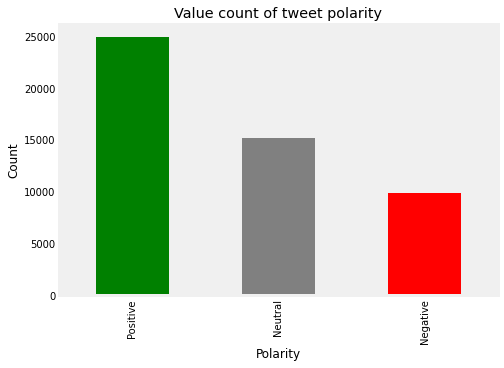

In [6]:
fig = plt.figure(figsize=(7,5))
color = ['green','grey','red']
cop26_b['Analysis'].value_counts().plot(kind='bar',color = color)
plt.title('Value count of tweet polarity')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

Pie Chart

Text(0.5, 1.0, 'Distribution of polarity')

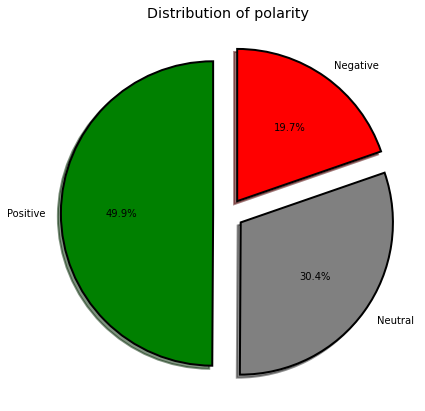

In [7]:
#pie chart to show percentage distribution of polarity
fig = plt.figure(figsize=(7,7))
colors = ('green', 'grey', 'red')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=cop26_b['Analysis'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of polarity')

Scatter Plot

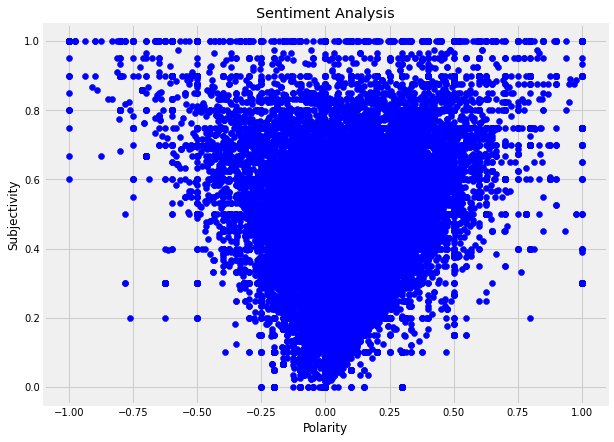

In [8]:
#plot the polarity and subjectivity on a scatter plot
plt.figure(figsize=(9,7))
for i in range(0,cop26_b.shape[0]):
    plt.scatter(cop26_b['Polarity'][i],cop26_b['Subjectivity'][i], color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

Word Cloud

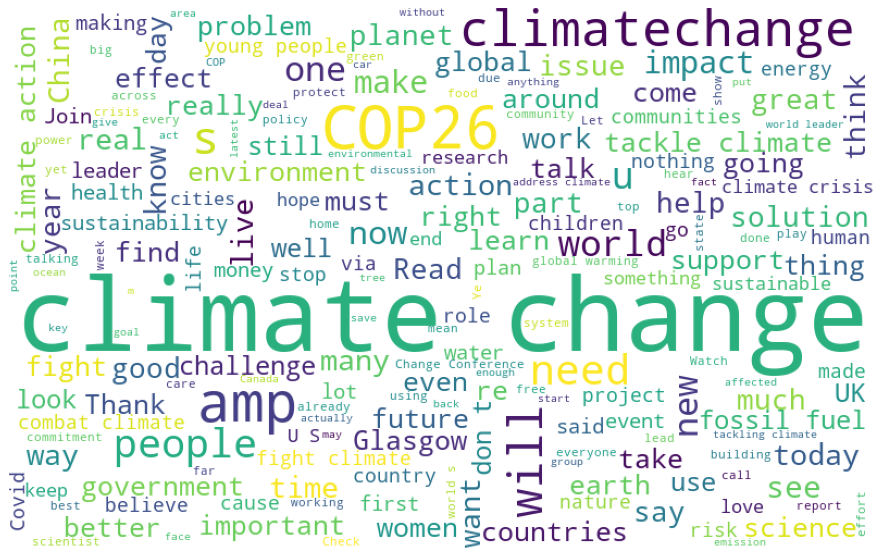

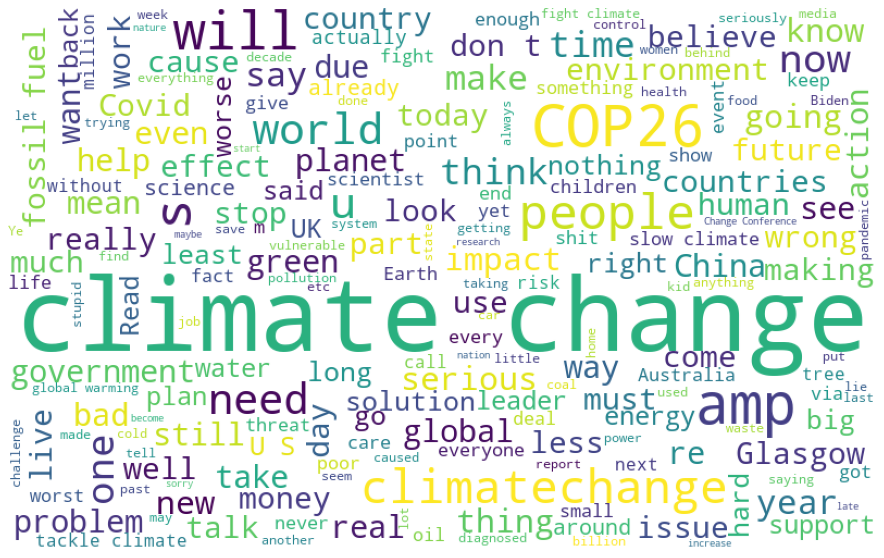

In [9]:
#create a function for wordcloud
def create_wordcloud(text):    
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()
#wordcloud for positive tweets
posTweets = cop26_b.loc[cop26_b['Analysis']=='Positive', 'cleanedTweets']
create_wordcloud(posTweets)
#wordcloud for negative tweets
negTweets = cop26_b.loc[cop26_b['Analysis']=='Negative', 'cleanedTweets']
create_wordcloud(negTweets)

Most Popular Words

In [10]:
cop26_b.dropna(subset=['cleanedTweets'], inplace=True)
cop26_b.isnull().sum()

Datetime             0
Tweets               0
Location         12530
cleanedTweets        0
Subjectivity         0
Polarity             0
Analysis             0
dtype: int64

In [11]:
#break each tweet sentence into words
sentences = []
for word in cop26_b['cleanedTweets']:
    sentences.append(word)
sentences
lines = list()
for line in sentences:
    words = line.split()
    for w in words:
        lines.append(w)
lines[:10] #shows first 10 words in the first tweet

['Climate',
 'Change',
 '-',
 "Wine's",
 'impact',
 'and',
 'what',
 'can',
 'be',
 'done']

In [12]:
#stemming all the words to their root word
stemmer = SnowballStemmer(language='english')
stem=[]
for word in lines:
    stem.append(stemmer.stem(word))
stem[:20]
#removes stopwords (very common words in a sentence)
stem2 = []
for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)
#creates a new dataframe for the stem and shows the count of the most used words
df = pd.DataFrame(stem2)
df=df[0].value_counts()
df #shows the new dataframe

climat                                                 47324
chang                                                  30940
cop26                                                   8341
climatechang                                            7483
change.                                                 6193
                                                       ...  
a🌍audi                                                     1
outshin                                                    1
i❤️it🤣                                                     1
contort                                                    1
environmentmangrovetreetreesclimatechangeiceiceberg        1
Name: 0, Length: 86891, dtype: int64

c:\Users\shama\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


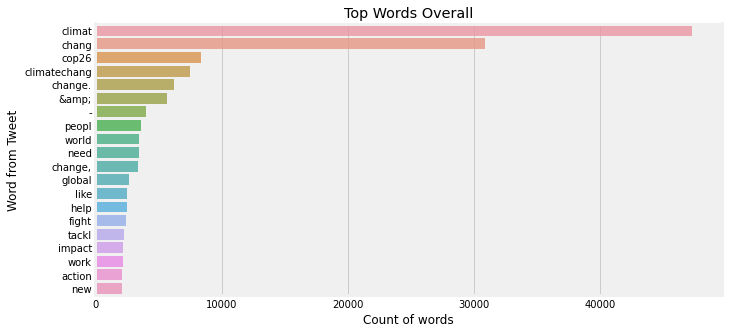

In [13]:
#plots the top 20 used words
df = df[:20]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.xlabel('Count of words', fontsize=12)
plt.ylabel('Word from Tweet', fontsize=12)
plt.show()